In [33]:
#similar to library()
require(ISLR)

In [34]:
#column names in df
names(Smarket)

[1] "Year"      "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Volume"    "Today"     "Direction"

In [117]:
#summary for each of the vars

#Direction is DV (Y)
summary(Smarket)

      Year           Lag1                Lag2                Lag3          
 Min.   :2001   Min.   :-4.922000   Min.   :-4.922000   Min.   :-4.922000  
 1st Qu.:2002   1st Qu.:-0.639500   1st Qu.:-0.639500   1st Qu.:-0.640000  
 Median :2003   Median : 0.039000   Median : 0.039000   Median : 0.038500  
 Mean   :2003   Mean   : 0.003834   Mean   : 0.003919   Mean   : 0.001716  
 3rd Qu.:2004   3rd Qu.: 0.596750   3rd Qu.: 0.596750   3rd Qu.: 0.596750  
 Max.   :2005   Max.   : 5.733000   Max.   : 5.733000   Max.   : 5.733000  
      Lag4                Lag5              Volume           Today          
 Min.   :-4.922000   Min.   :-4.92200   Min.   :0.3561   Min.   :-4.922000  
 1st Qu.:-0.640000   1st Qu.:-0.64000   1st Qu.:1.2574   1st Qu.:-0.639500  
 Median : 0.038500   Median : 0.03850   Median :1.4229   Median : 0.038500  
 Mean   : 0.001636   Mean   : 0.00561   Mean   :1.4783   Mean   : 0.003138  
 3rd Qu.: 0.596750   3rd Qu.: 0.59700   3rd Qu.:1.6417   3rd Qu.: 0.596750  
 Max. 

In [36]:
#direction as response
#see if we can predict it as a binary response
#using Logistic Regression

#X == today,yesterday, 2 days ago, 3,4,5
?Smarket

In [118]:
head(Smarket)

Year Lag1   Lag2   Lag3   Lag4   Lag5   Volume Today  Direction
1 2001  0.381 -0.192 -2.624 -1.055  5.010 1.1913  0.959 Up       
2 2001  0.959  0.381 -0.192 -2.624 -1.055 1.2965  1.032 Up       
3 2001  1.032  0.959  0.381 -0.192 -2.624 1.4112 -0.623 Down     
4 2001 -0.623  1.032  0.959  0.381 -0.192 1.2760  0.614 Up       
5 2001  0.614 -0.623  1.032  0.959  0.381 1.2057  0.213 Up       
6 2001  0.213  0.614 -0.623  1.032  0.959 1.3491  1.392 Up

function (x, ...) 
UseMethod("pairs")
<bytecode: 0x0000000013982250>
<environment: namespace:graphics>

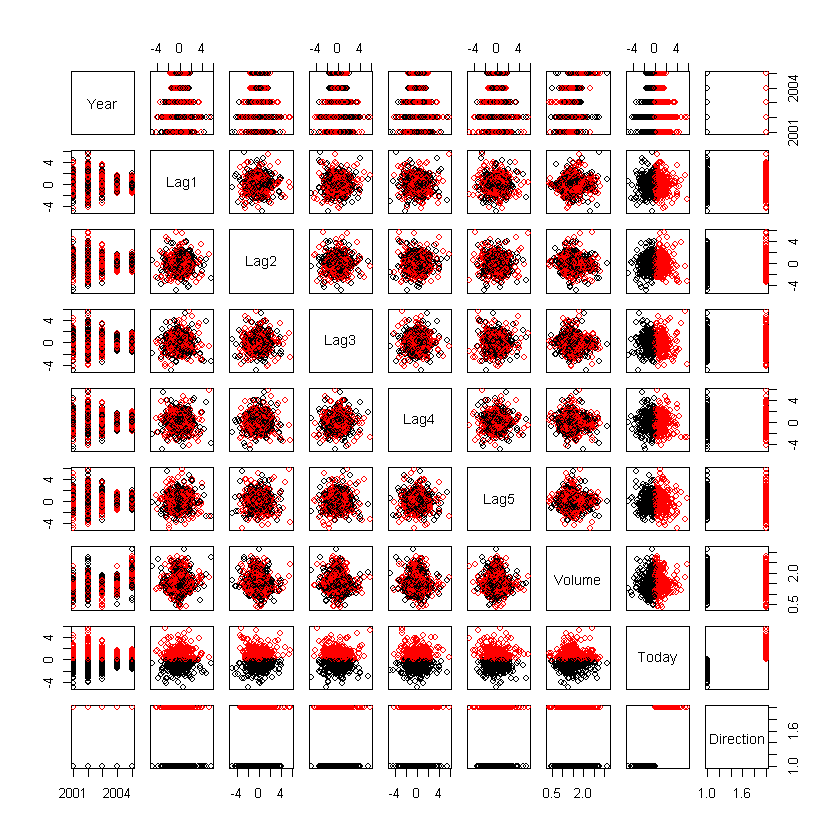

In [119]:
#plot of data

#plot vars in df Smarket
#color indicator is our response var (two-classes)
#does not seem to be much correlation

# the class variable is derived from the variable
#today, and so up or down seems to make a division.
pairs(Smarket, col=Smarket$Direction)
pairs

### Logistic Regression

In [120]:
#many models available through glm 
#direction == Y
#predictors after ~
#binomial == tells it we want a Logistic Regression
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume, 
            data=Smarket, family=binomial)

In [121]:
#none of the coefficients are sig.
#could be vars corr
#plot does not suggest that tho
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = binomial, data = Smarket)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.446  -1.203   1.065   1.145   1.326  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) -0.126000   0.240736  -0.523    0.601
Lag1        -0.073074   0.050167  -1.457    0.145
Lag2        -0.042301   0.050086  -0.845    0.398
Lag3         0.011085   0.049939   0.222    0.824
Lag4         0.009359   0.049974   0.187    0.851
Lag5         0.010313   0.049511   0.208    0.835
Volume       0.135441   0.158360   0.855    0.392

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1731.2  on 1249  degrees of freedom
Residual deviance: 1727.6  on 1243  degrees of freedom
AIC: 1741.6

Number of Fisher Scoring iterations: 3


In [122]:
#make predictions from fitted model
#will make predictions on the training data that we use to fit the model
#gives a vector of fitted probabilities
glm.probs <- predict(glm.fit, type='response')

In [123]:
#look at first 5 probabilities
#all close to 50% (not surprisingly)

#prob of whether will go up/down
#based on the lags and other predictors
glm.probs[1:5]

1         2         3         4         5 
0.5070841 0.4814679 0.4811388 0.5152224 0.5107812

In [124]:
#vector of logicals (T/F)
#element by element
#if TRUE == 'Up';else False == 'Down'
glm.pred<-ifelse(glm.probs>0.5, 'Up','Down')

In [125]:
#attach so vars available by name
attach(Smarket)

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 5):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




In [126]:
#predicted direction vs. true direction

#lots of element in off diagonal (error)
table(glm.pred,Direction)

        Direction
glm.pred Down  Up
    Down  145 141
    Up    457 507

In [127]:
#classification rate == predicted divided / by total
mean(glm.pred==Direction)

[1] 0.5216

In [128]:
#mean classification performance

#pred == true
#gives you proportion

#on training data, a lil better than chance
mean(glm.pred==Direction)

[1] 0.5216

### Make Training and Test set

In [47]:
#make vector of lgicals
#train == less than 2005 data
#if so, TRUE, else, FALSE
train <- Year<2005

In [48]:
#add subset == train
#use observations whete train is TRUE
#fit data where year less than 2005
glm.fit <- glm(Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume,
              data=Smarket, family=binomial, subset=train)

In [49]:
#index by not train [!train,]
#TRUE if 2005 or more
#type = 'response' to predict probabilities
glm.probs<-predict(glm.fit,newdata=Smarket[!train,],type='response')

In [50]:
#predict direction w/ ifelse statement
glm.pred<-ifelse(glm.probs>0.5,'Up','Down')

In [80]:
#a subset for test data 
#(up/down for 2005)
Direction.2005<-Smarket$Direction[!train]

In [52]:
#table for test data
table(glm.pred,Direction.2005)

        Direction.2005
glm.pred Down Up
    Down   77 97
    Up     34 44

In [53]:
#less than 50% (worse than Null)
#may be overfitting
#reason we are doing worse on test data
mean(glm.pred==Direction.2005)

[1] 0.4801587

### Fit Smaller Model

In [54]:
#fit smaller model (only 2 vars)
glm.fit <- glm(Direction~Lag1+Lag2,
              data=Smarket, family=binomial, subset=train)

#probabiloities
glm.probs<-predict(glm.fit,newdata=Smarket[!train,],type='response')

glm.pred<-ifelse(glm.probs>0.5,'Up','Down')

Direction.2005<-Smarket$Direction[!train]

#table for smaller model
table(glm.pred,Direction.2005)

#higher correct classification (56%)
mean(glm.pred==Direction.2005)

        Direction.2005
glm.pred Down  Up
    Down   35  35
    Up     76 106

[1] 0.5595238

In [55]:
# accuracy for 'Up'?
106/(76+106)

[1] 0.5824176

In [32]:
#nothing became significant
#but performance improved
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Smarket, 
    subset = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.345  -1.188   1.074   1.164   1.326  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03222    0.06338   0.508    0.611
Lag1        -0.05562    0.05171  -1.076    0.282
Lag2        -0.04449    0.05166  -0.861    0.389

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 995  degrees of freedom
AIC: 1387.4

Number of Fisher Scoring iterations: 3


### Linear  Discriminant Analysis

In [90]:
require(ISLR)
require(MASS)

In [1]:
library(MASS)

In [4]:
#MASS

In [91]:
help(lda)

In [57]:
#fit LDA model to Smarket data; 2 predictors
#train model
lda.fit=lda(Direction~Lag1+Lag2,
            data=Smarket,subset=train)


In [92]:
# direction that the market took on a particular day.
# And we're going to use the returns on the previous two
# days to try and predict the direction on
# this particular day.

lda.fit=lda(Direction~Lag1+Lag2,
            data=Smarket,subset=Year<2005)

In [93]:
#show output for fitted model (summary)

# prior probabilities are just the proportions of ups
# and downs in the data set.
# It's roughly 50%, which says something
# about the market (half of time up/half down)

#maybe slight difference between group means

#LDA function fits a linear
#function for separating the two groups.
#LDA coefficient == 2 coefficients
lda.fit

Call:
lda(Direction ~ Lag1 + Lag2, data = Smarket, subset = Year < 
    2005)

Prior probabilities of groups:
    Down       Up 
0.491984 0.508016 

Group means:
            Lag1        Lag2
Down  0.04279022  0.03389409
Up   -0.03954635 -0.03132544

Coefficients of linear discriminants:
            LD1
Lag1 -0.6420190
Lag2 -0.5135293

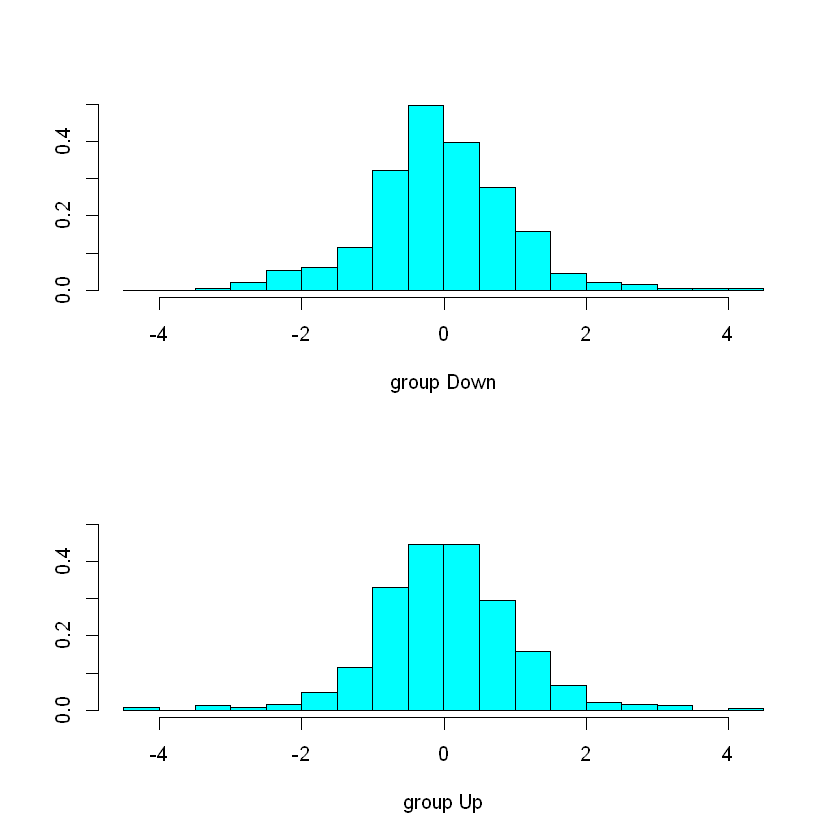

In [94]:
#plor LDA

# It plots a linear discriminant function
#separately, for the
# values of the linear discriminant function,
# separately for the up group and the down group.

#not much difference == not surprise
#not easy to predict the market
plot(lda.fit)

In [99]:
#make subset of the data; 
#subset function == 1st df; 2nd logical expression

#== df of just year 2005
#test data
Smarket.2005 <- subset(Smarket, Year==2005)

In [100]:
#predict on 2005; fit model from training data

# So we'd call the predict method for an LDA fit
# give it our fit; give it this new data frame
# Smarket dot 2005.
#make some predictions
lda.pred<-predict(lda.fit, Smarket.2005)

In [103]:
#print first 5

#not lda.pred[1:5,] b/c not in matrix format
#lda.pred[1:5]

In [104]:
#check what format it is (list)
class(lda.pred)

[1] "list"

In [109]:
#3 columns
names(lda.pred)

[1] "class"     "posterior" "x"

In [107]:
# when you have a list of variables, 
#and each of the variables have the same number of observations, 
# look at list is through data frame.

#convert list to df

# makes two columns, one for up and one for down--
# the posterior probabilities.
# And then there's the actual values of the LDA score
data.frame(lda.pred)[1:5,]

class posterior.Down posterior.Up LD1        
999  Up    0.4901792      0.5098208     0.08293096
1000 Up    0.4792185      0.5207815     0.59114102
1001 Up    0.4668185      0.5331815     1.16723063
1002 Up    0.4740011      0.5259989     0.83335022
1003 Up    0.4927877      0.5072123    -0.03792892

In [83]:
#up/down vector
lda.class <- lda.pred$class

In [67]:
#lda.class

In [111]:
#Prediction vs True classification
# confusion matrix; tells us which downs were classified as down,
# which downs are classified as up,

# off-diagonal elements of those that are the
# mistakes, and the diagonal elements which are the correct
# classifications.
table(lda.pred$class, Smarket.2005$Direction)

      
       Down  Up
  Down   35  35
  Up     76 106

In [112]:
#correct predictions/over total predictions

#classification rate (T/F)
#conditional comparing where they are equal
#.56

#not big, but a little edge
mean(lda.pred$class==Smarket.2005$Direction)

[1] 0.5595238

### K-Nearest Neighbors

In [129]:
#knn does best 1/3 of the time
#one of the most simple 
library(class)

In [133]:
#train,test
#== asks for the training and test x vars

#cl
#and classification labels for the training

#k=1
#what value of k you want


#sum of arguments
?knn

In [131]:
#makes vars from df available by name
attach(Smarket)

The following objects are masked from Smarket (pos = 4):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year


The following objects are masked from Smarket (pos = 7):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




In [134]:
#check available vars
ls()

[1] "Direction.2005" "glm.fit"        "glm.pred"       "glm.probs"     
[5] "lda.class"      "lda.fit"        "lda.pred"       "Smarket.2005"  
[9] "train"

In [137]:
objects(2)

[1] "Direction" "Lag1"      "Lag2"      "Lag3"      "Lag4"      "Lag5"     
[7] "Today"     "Volume"    "Year"

In [139]:
#make matrix (of 2 columns, lag1/lag2)
Xlag<-cbind(Lag1,Lag2)

In [140]:
head(Xlag)

Lag1   Lag2  
[1,]  0.381 -0.192
[2,]  0.959  0.381
[3,]  1.032  0.959
[4,] -0.623  1.032
[5,]  0.614 -0.623
[6,]  0.213  0.614

In [141]:
#look at first five rows 
Xlag[1:5,]

Lag1   Lag2  
[1,]  0.381 -0.192
[2,]  0.959  0.381
[3,]  1.032  0.959
[4,] -0.623  1.032
[5,]  0.614 -0.623

In [142]:
#vector of T/F where Year less than 2005
#binary
train <- Year<2005

In [144]:
head(train)

[1] TRUE TRUE TRUE TRUE TRUE TRUE

### K=1

In [146]:
#1) index by train
#2) index by not train (test); 2005
#3) response == Direction
#4) k =1 == one nearest neighbor classification
#== look at new test point's nearest 
#training point (euclidian)
knn.pred<-knn(Xlag[train,],
              Xlag[!train,], 
             Direction[train], k=1)

In [147]:
#confusion matrix
#compare predicted vs. actual
table(knn.pred,Direction[!train])

        
knn.pred Down Up
    Down   43 58
    Up     68 83

In [150]:
#50% classification accuracy
#flipping coin odds; not good
classification <- mean(knn.pred==Direction[!train])
classification

[1] 0.5

### k=n (different variations)

In [212]:

#classification changes b/c in tie 
#it picks at random the classification 
knn.pred2<-knn(Xlag[train,],
              Xlag[!train,], 
             Direction[train], k=3)

In [213]:
table(knn.pred2, Direction[!train])

         
knn.pred2 Down Up
     Down   48 54
     Up     63 87

In [214]:
#slightly worse for k=5,8; better for k=2,3 (54%) and 4 (52%); after 5 it gets worse
mean(knn.pred2==Direction[!train])

[1] 0.5357143